In [1]:
from noise import decompress_pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA, PCA
import plotly.io as pio
import plotly.graph_objects as go
from scipy.fft import rfft, rfftfreq
import numpy as np
from sklearn.decomposition import PCA

pio.renderers.default = 'iframe' # or 'notebook' or 'colab'

INPUT_DATA_PATH = '../input-data/'
data = decompress_pickle(INPUT_DATA_PATH + 'cycle_data')

In [2]:
def gen_component_fft(signal):
    complement = np.zeros(512 - signal.shape[0])
    new_signal = np.concatenate((signal, complement))
    yf = rfft(new_signal)
    xf = rfftfreq(new_signal.shape[0], 1 / 15360)
    
    max_y = np.max(np.abs(yf))
    index = np.where(np.abs(yf) == max_y)[0][0]
    common_freq = xf[index]
    return xf, np.abs(yf), common_freq, max_y

In [3]:
c = 0
for i, d in enumerate(data):
    if d['fault_type'] == 'ABT':
        print(i)
        c += 1
        if c == 4:
            break

3
7
28
32


## Working data example

In [9]:
cols = int(sample['i_cycle_1'].shape[0] / 4)

In [10]:
sample = data[4]
X = sample['i_cycle_1'].reshape((4, cols)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X)

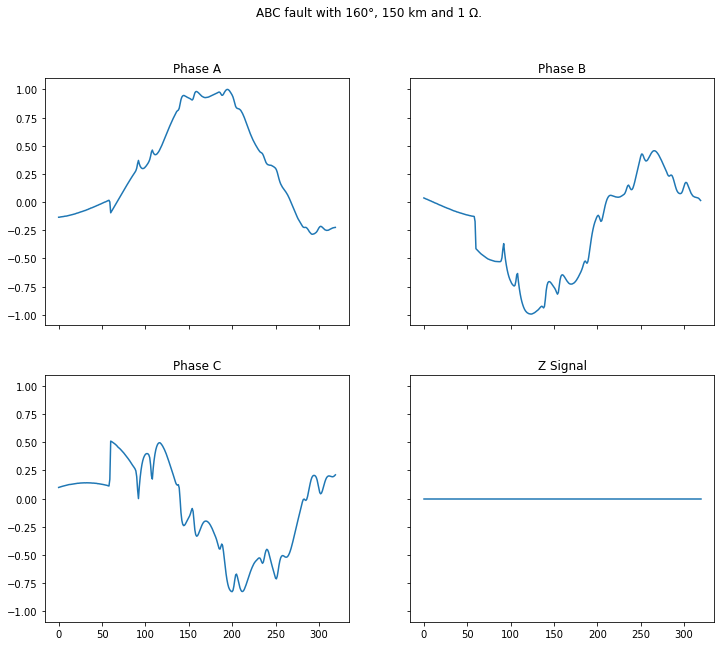

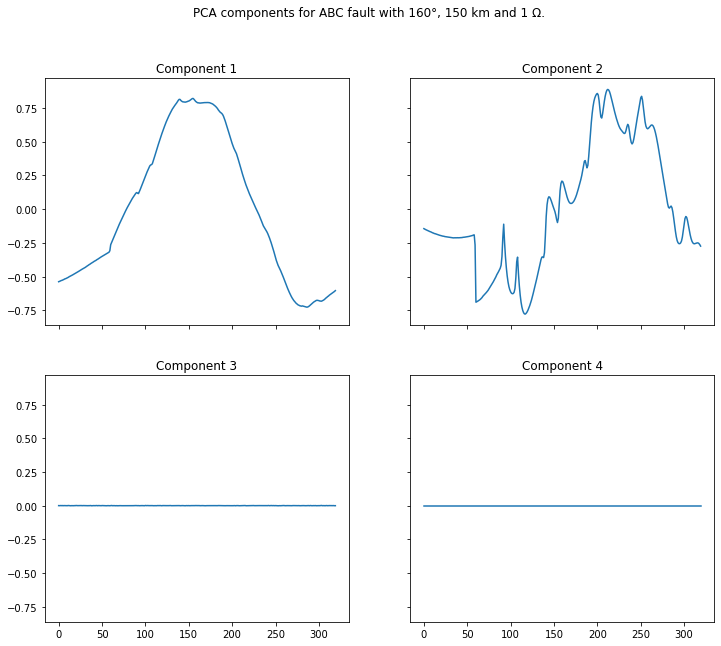

In [11]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

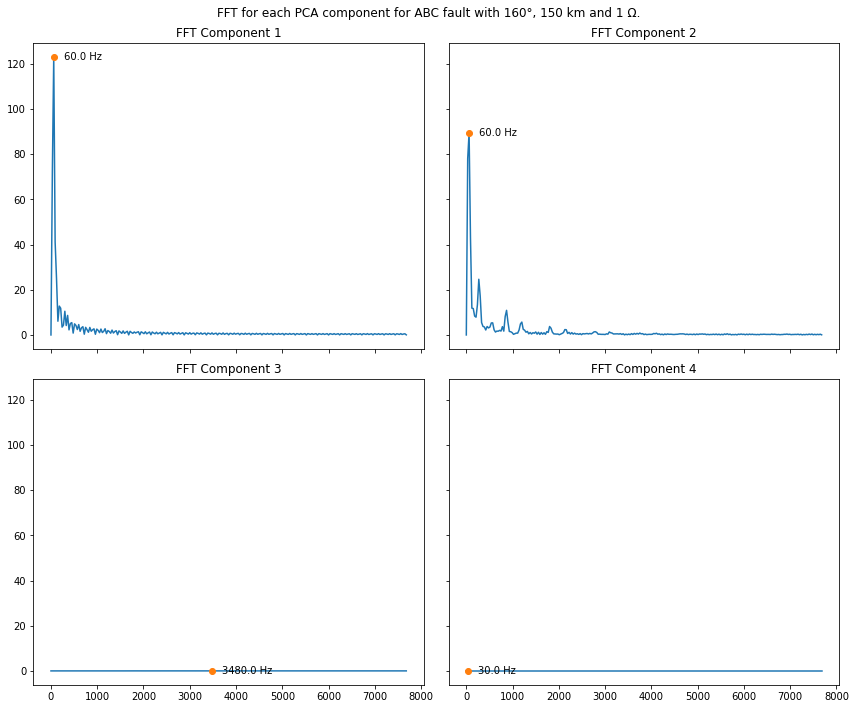

In [12]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

In [13]:
xf

array([   0.,   30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,
        270.,  300.,  330.,  360.,  390.,  420.,  450.,  480.,  510.,
        540.,  570.,  600.,  630.,  660.,  690.,  720.,  750.,  780.,
        810.,  840.,  870.,  900.,  930.,  960.,  990., 1020., 1050.,
       1080., 1110., 1140., 1170., 1200., 1230., 1260., 1290., 1320.,
       1350., 1380., 1410., 1440., 1470., 1500., 1530., 1560., 1590.,
       1620., 1650., 1680., 1710., 1740., 1770., 1800., 1830., 1860.,
       1890., 1920., 1950., 1980., 2010., 2040., 2070., 2100., 2130.,
       2160., 2190., 2220., 2250., 2280., 2310., 2340., 2370., 2400.,
       2430., 2460., 2490., 2520., 2550., 2580., 2610., 2640., 2670.,
       2700., 2730., 2760., 2790., 2820., 2850., 2880., 2910., 2940.,
       2970., 3000., 3030., 3060., 3090., 3120., 3150., 3180., 3210.,
       3240., 3270., 3300., 3330., 3360., 3390., 3420., 3450., 3480.,
       3510., 3540., 3570., 3600., 3630., 3660., 3690., 3720., 3750.,
       3780., 3810.,

## Falta ABC

In [16]:
sample = data[4]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

In [17]:
pca.explained_variance_ratio_

array([7.65604414e-01, 2.34395022e-01, 5.63420578e-07, 3.28244059e-26])

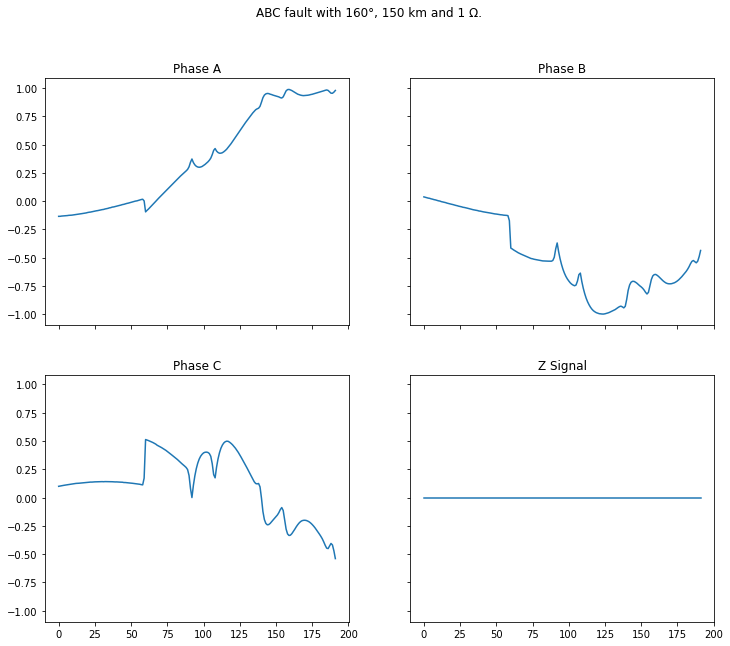

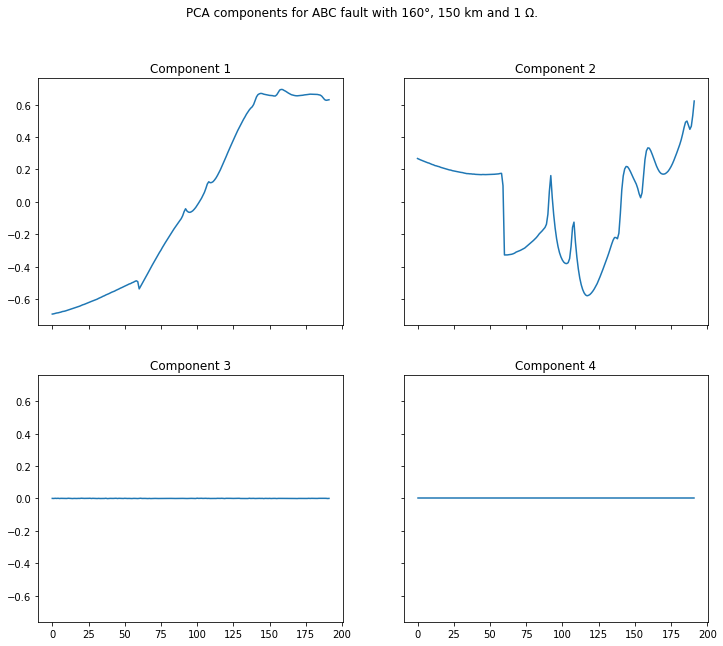

In [19]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

In [22]:
xf, yf, cf, max_y = gen_component_fft(c_[:,0])

In [23]:
fig = go.Figure(data=go.Scatter(x=xf, y=yf))
fig.show()

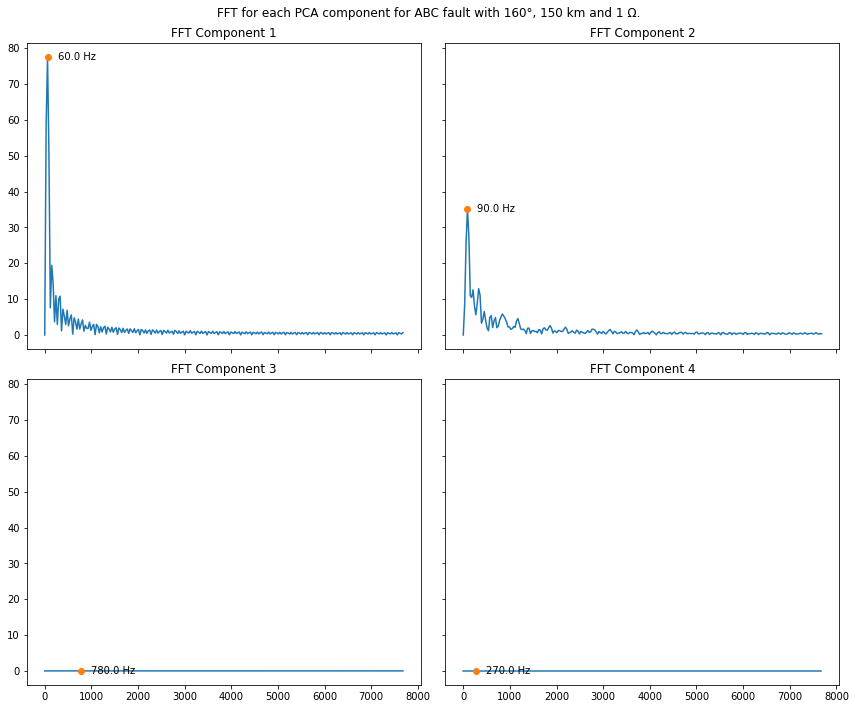

In [24]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

In [25]:
sample = data[5]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

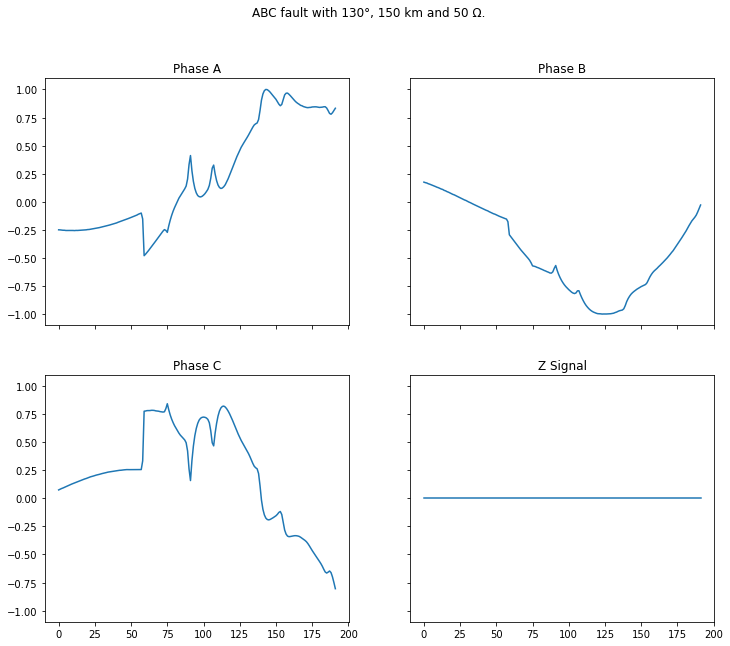

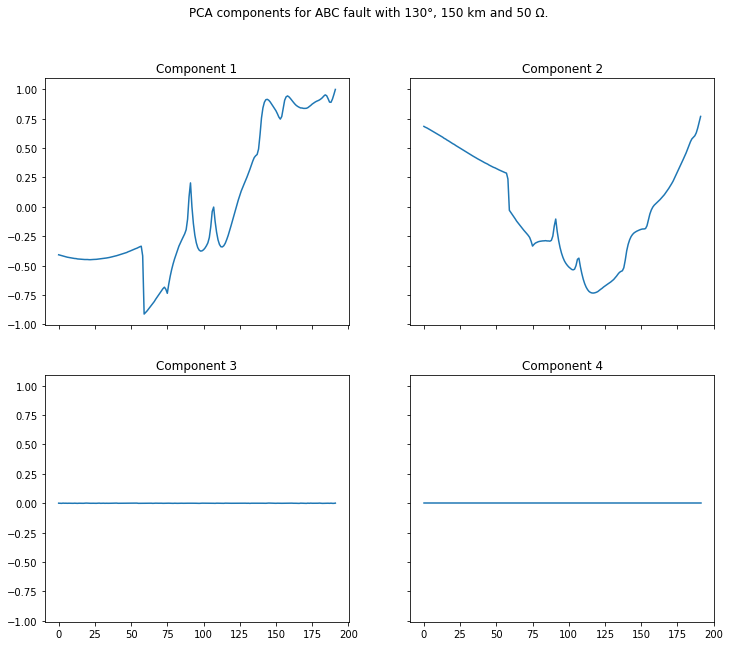

In [26]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

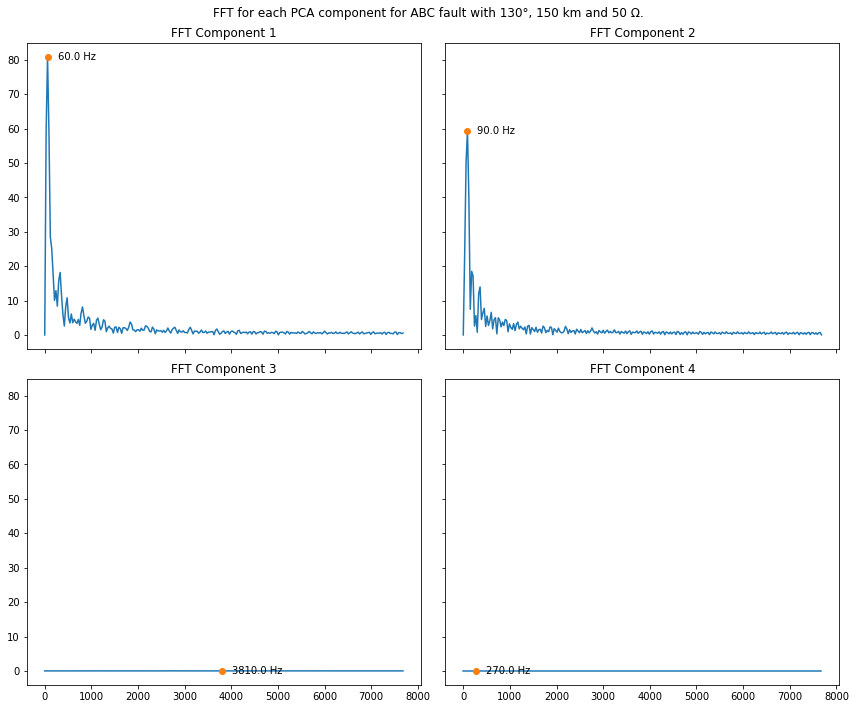

In [27]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

In [28]:
sample = data[6]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

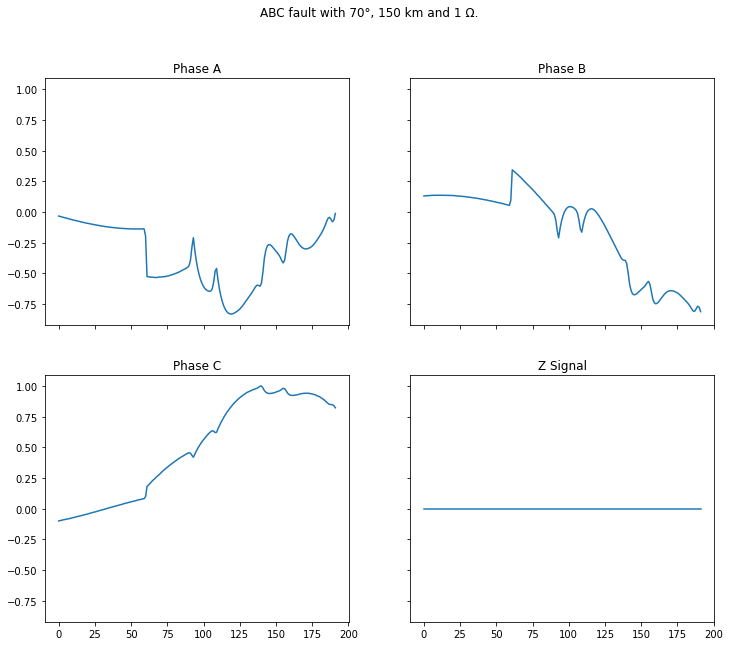

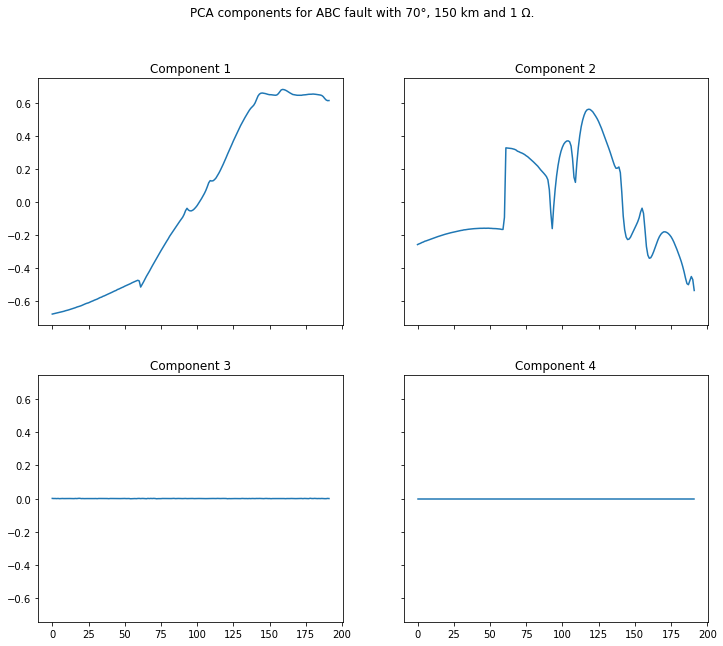

In [29]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

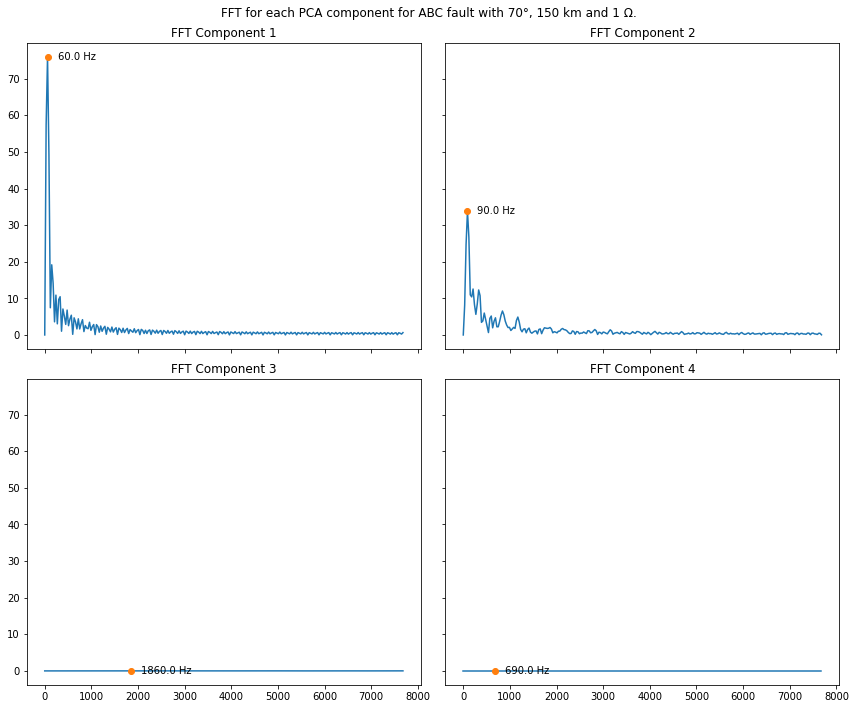

In [30]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

## Falta ABT

In [41]:
sample = data[3]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

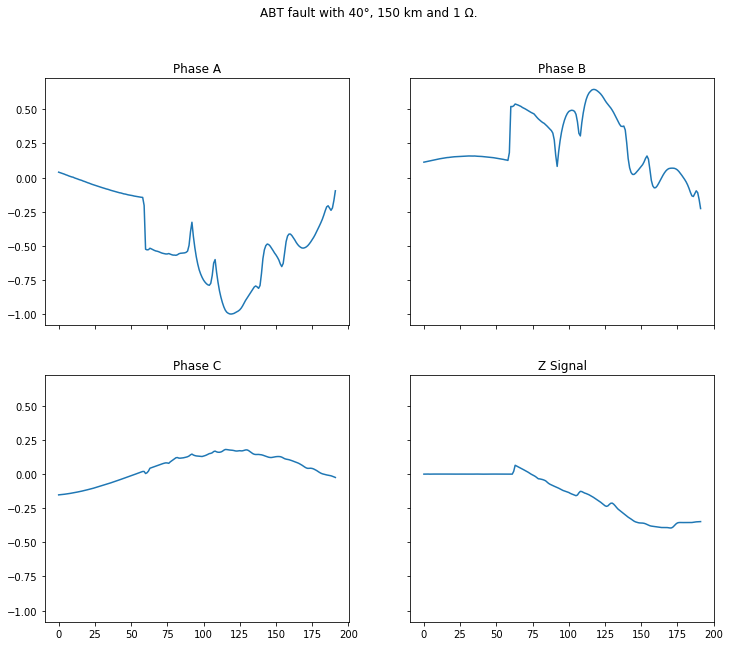

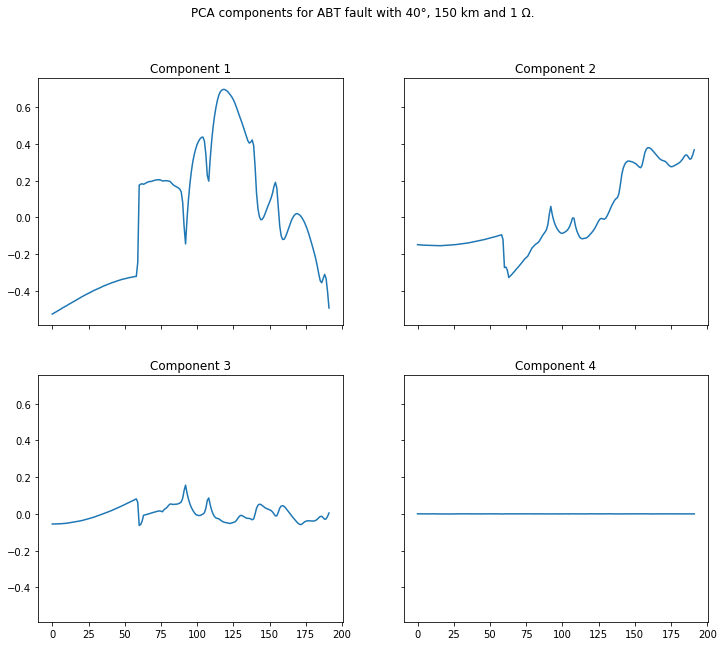

In [42]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

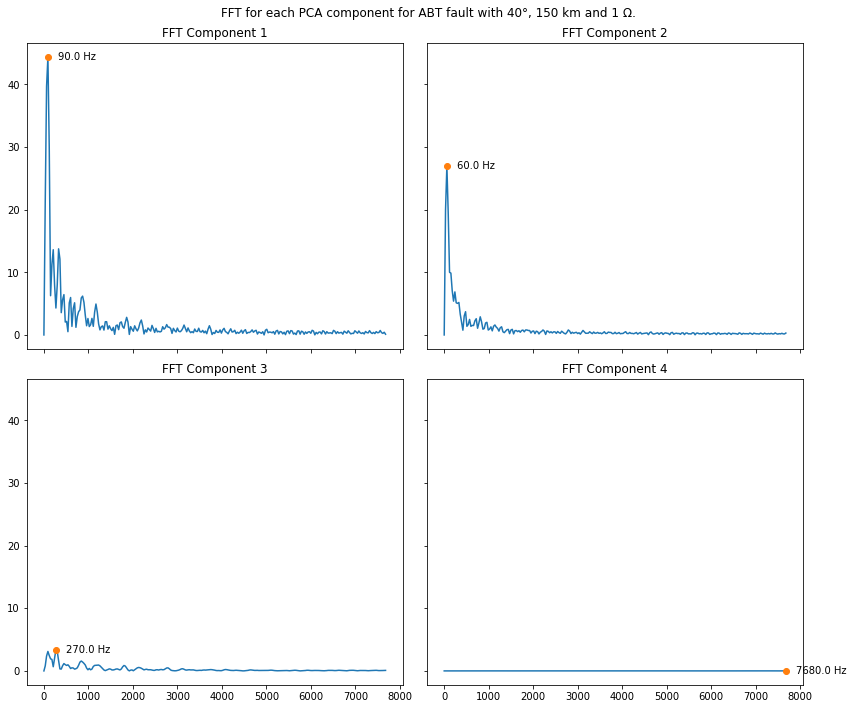

In [44]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

In [45]:
sample = data[7]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

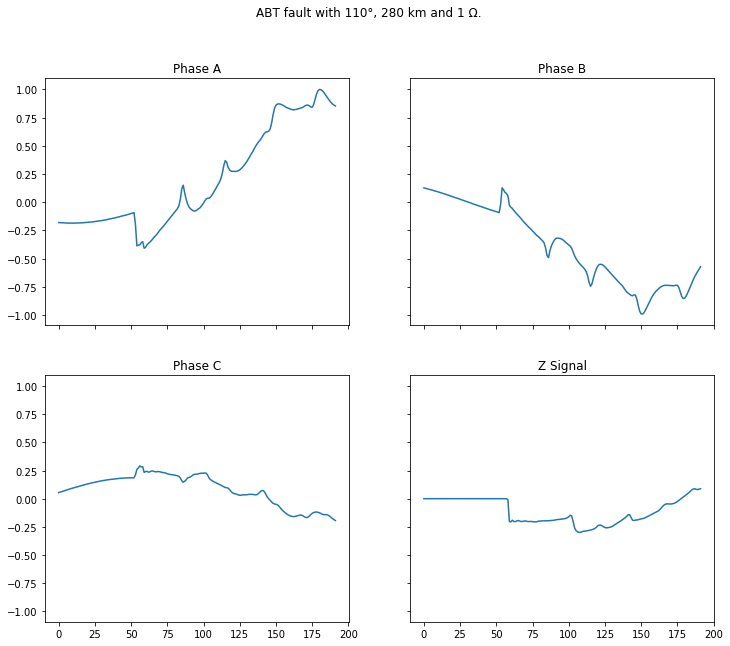

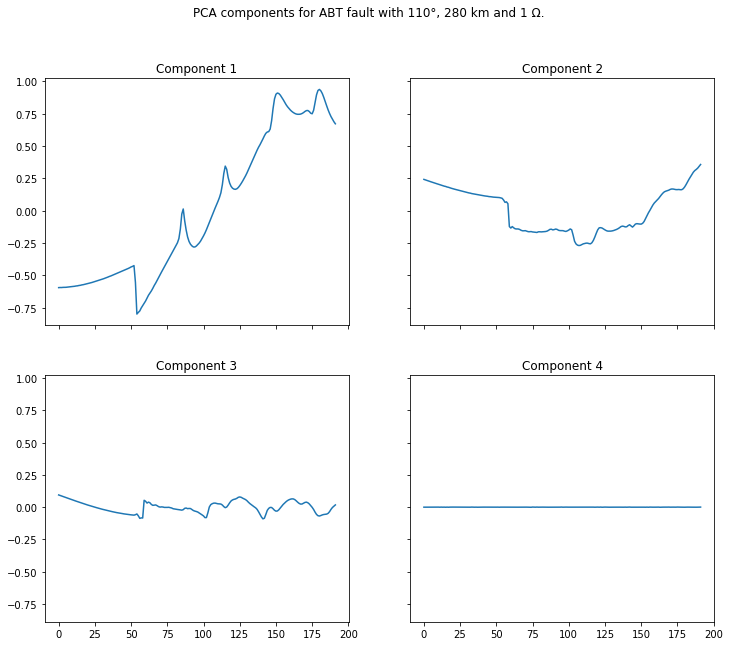

In [46]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

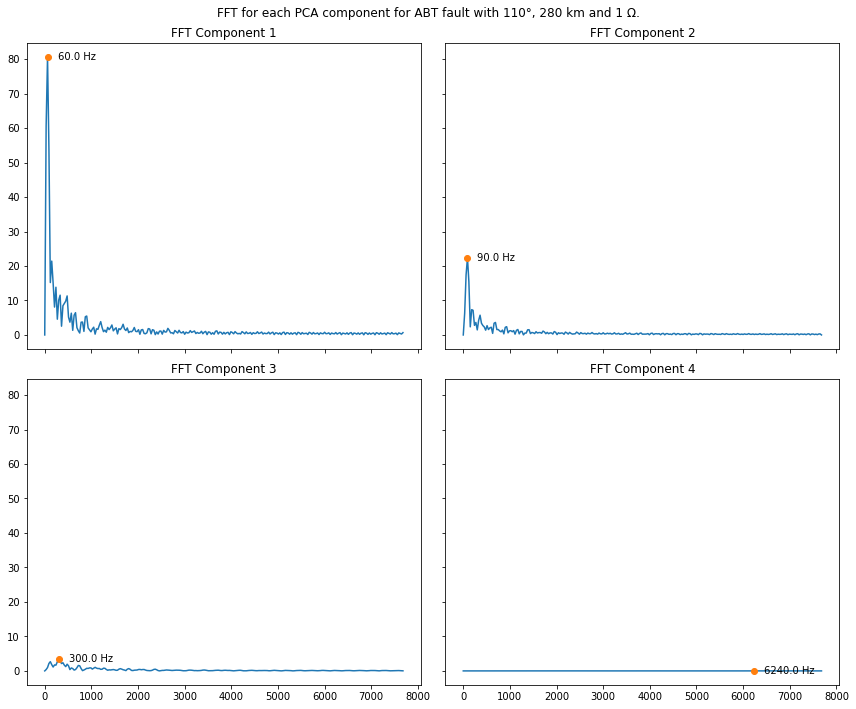

In [47]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

In [52]:
sample = data[28]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

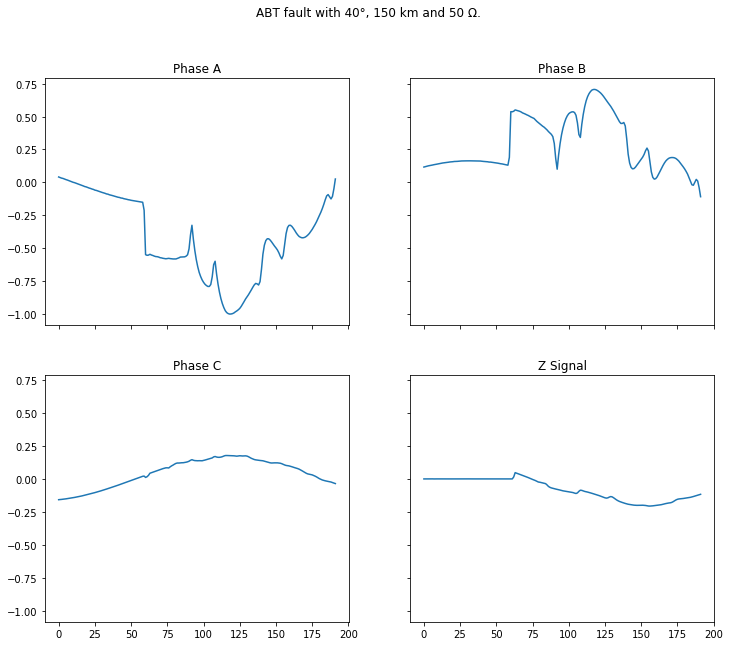

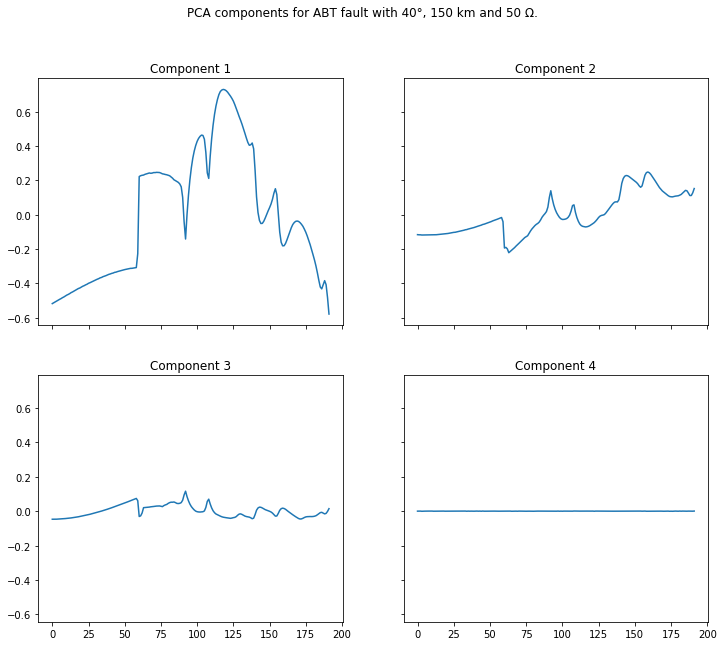

In [53]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(X[:,0])
ax[0][0].set_title('Phase A')
ax[0][1].plot(X[:,1])
ax[0][1].set_title('Phase B')
ax[1][0].plot(X[:,2])
ax[1][0].set_title('Phase C')
ax[1][1].plot(X[:,3])
ax[1][1].set_title('Z Signal')
f.suptitle(f'{sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
ax[0][0].plot(c_[:,0])
ax[0][0].set_title('Component 1')
ax[0][1].plot(c_[:,1])
ax[0][1].set_title('Component 2')
ax[1][0].plot(c_[:,2])
ax[1][0].set_title('Component 3')
ax[1][1].plot(c_[:,3])
ax[1][1].set_title('Component 4')
f.suptitle(f'PCA components for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.show()

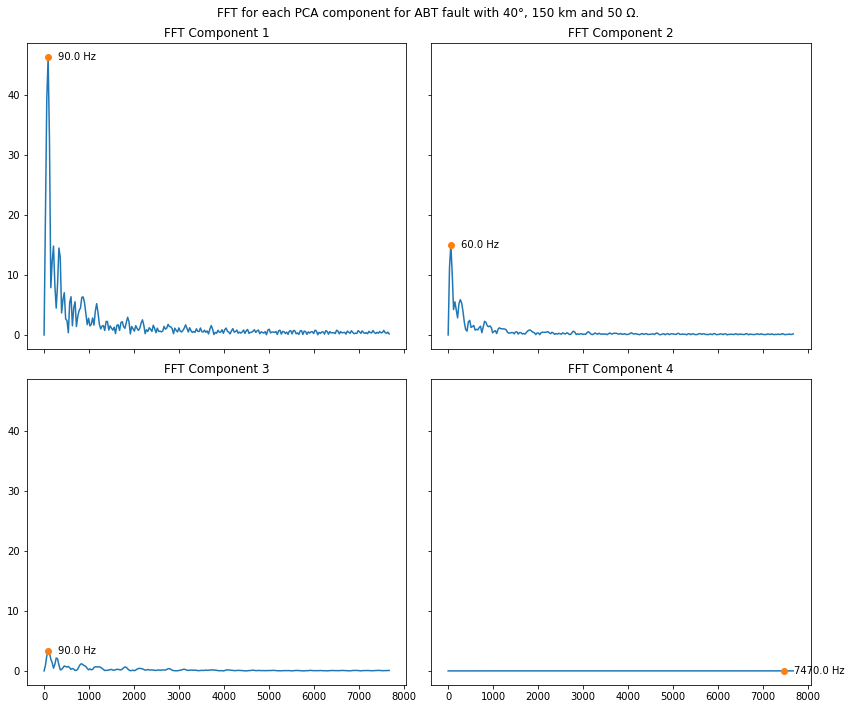

In [54]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

## AB

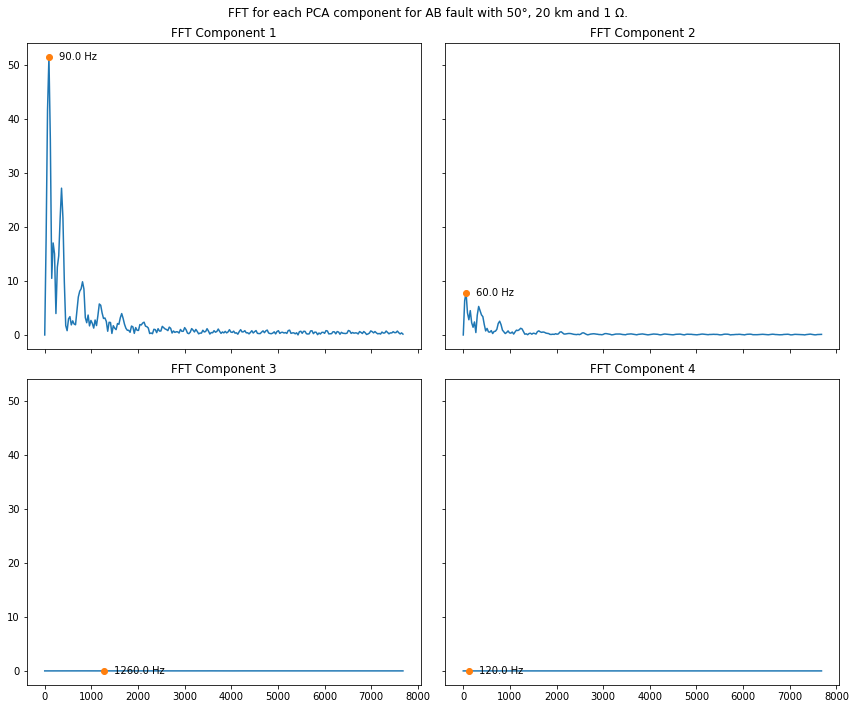

In [55]:
sample = data[18]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals

f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

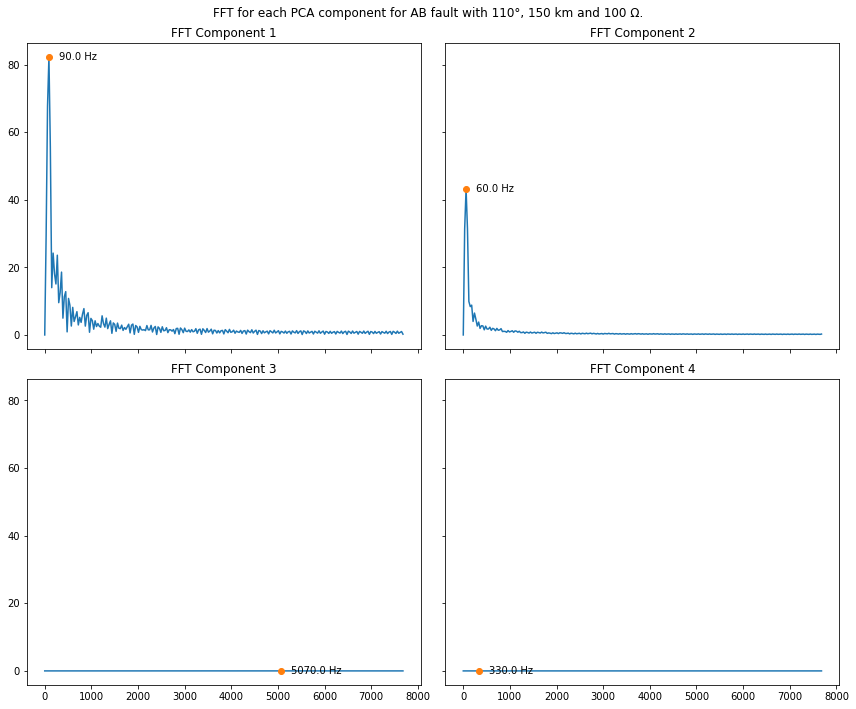

In [56]:
sample = data[21]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')

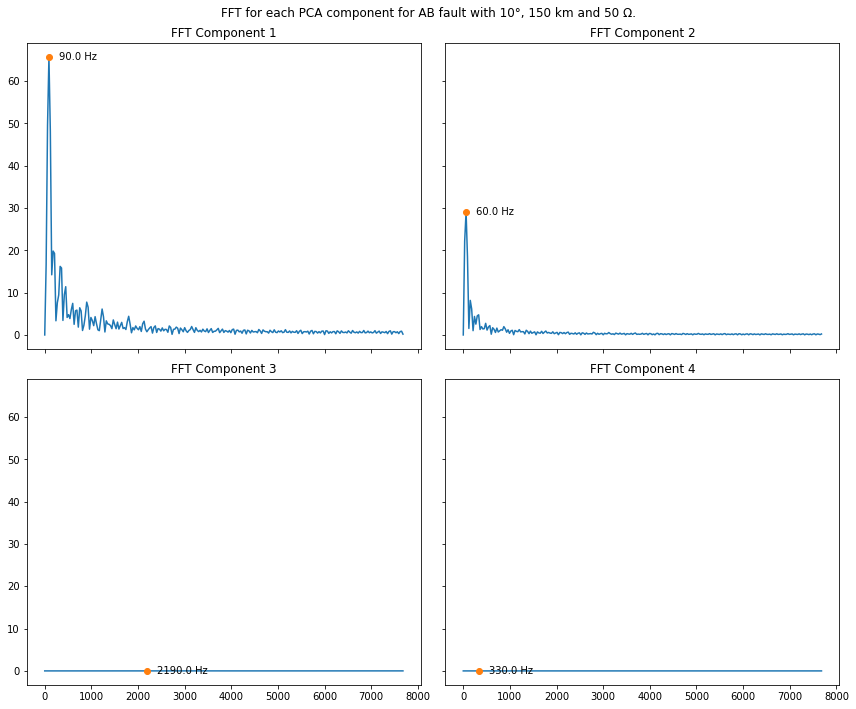

In [57]:
sample = data[25]
X = sample['i_cycle_2'].reshape((4, 192)).T
pca = PCA(n_components=4)
c_ = pca.fit_transform(X) # Reconstruct signals


f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,10))
xf, yf, cf, max_y = gen_component_fft(c_[:,0])
ax[0][0].plot(xf, yf)
ax[0][0].plot(cf, max_y, 'o')
ax[0][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][0].set_title('FFT Component 1')

xf, yf, cf, max_y = gen_component_fft(c_[:,1])
ax[0][1].plot(xf, yf)
ax[0][1].plot(cf, max_y, 'o')
ax[0][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[0][1].set_title('FFT Component 2')

xf, yf, cf, max_y = gen_component_fft(c_[:,2])
ax[1][0].plot(xf, yf)
ax[1][0].plot(cf, max_y, 'o')
ax[1][0].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][0].set_title('FFT Component 3')

xf, yf, cf, max_y = gen_component_fft(c_[:,3])
ax[1][1].plot(xf, yf)
ax[1][1].plot(cf, max_y, 'o')
ax[1][1].annotate(f'{cf} Hz',
            xy=(cf, max_y),
            xytext=(10, -5),
            textcoords='offset points',
            horizontalalignment='left',
            verticalalignment='bottom')
ax[1][1].set_title('FFT Component 4')

f.suptitle(f'FFT for each PCA component for {sample["fault_type"]} fault with {sample["angle"]}°, {sample["distance"]} km '
           f'and {sample["resistance"].split(".")[0]} Ω.')
plt.tight_layout()
plt.savefig(f'pca_fft_{sample["fault_type"]}_{sample["angle"]}_{sample["distance"]}_{sample["resistance"].split(".")[0]}.png')